<a href="https://colab.research.google.com/github/melchilegion/Qwasar.io/blob/main/my_paypal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

file_path = "/content/drive/MyDrive/my paypal/creditcard.csv"
df = pd.read_csv(file_path)

In [7]:
print (df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

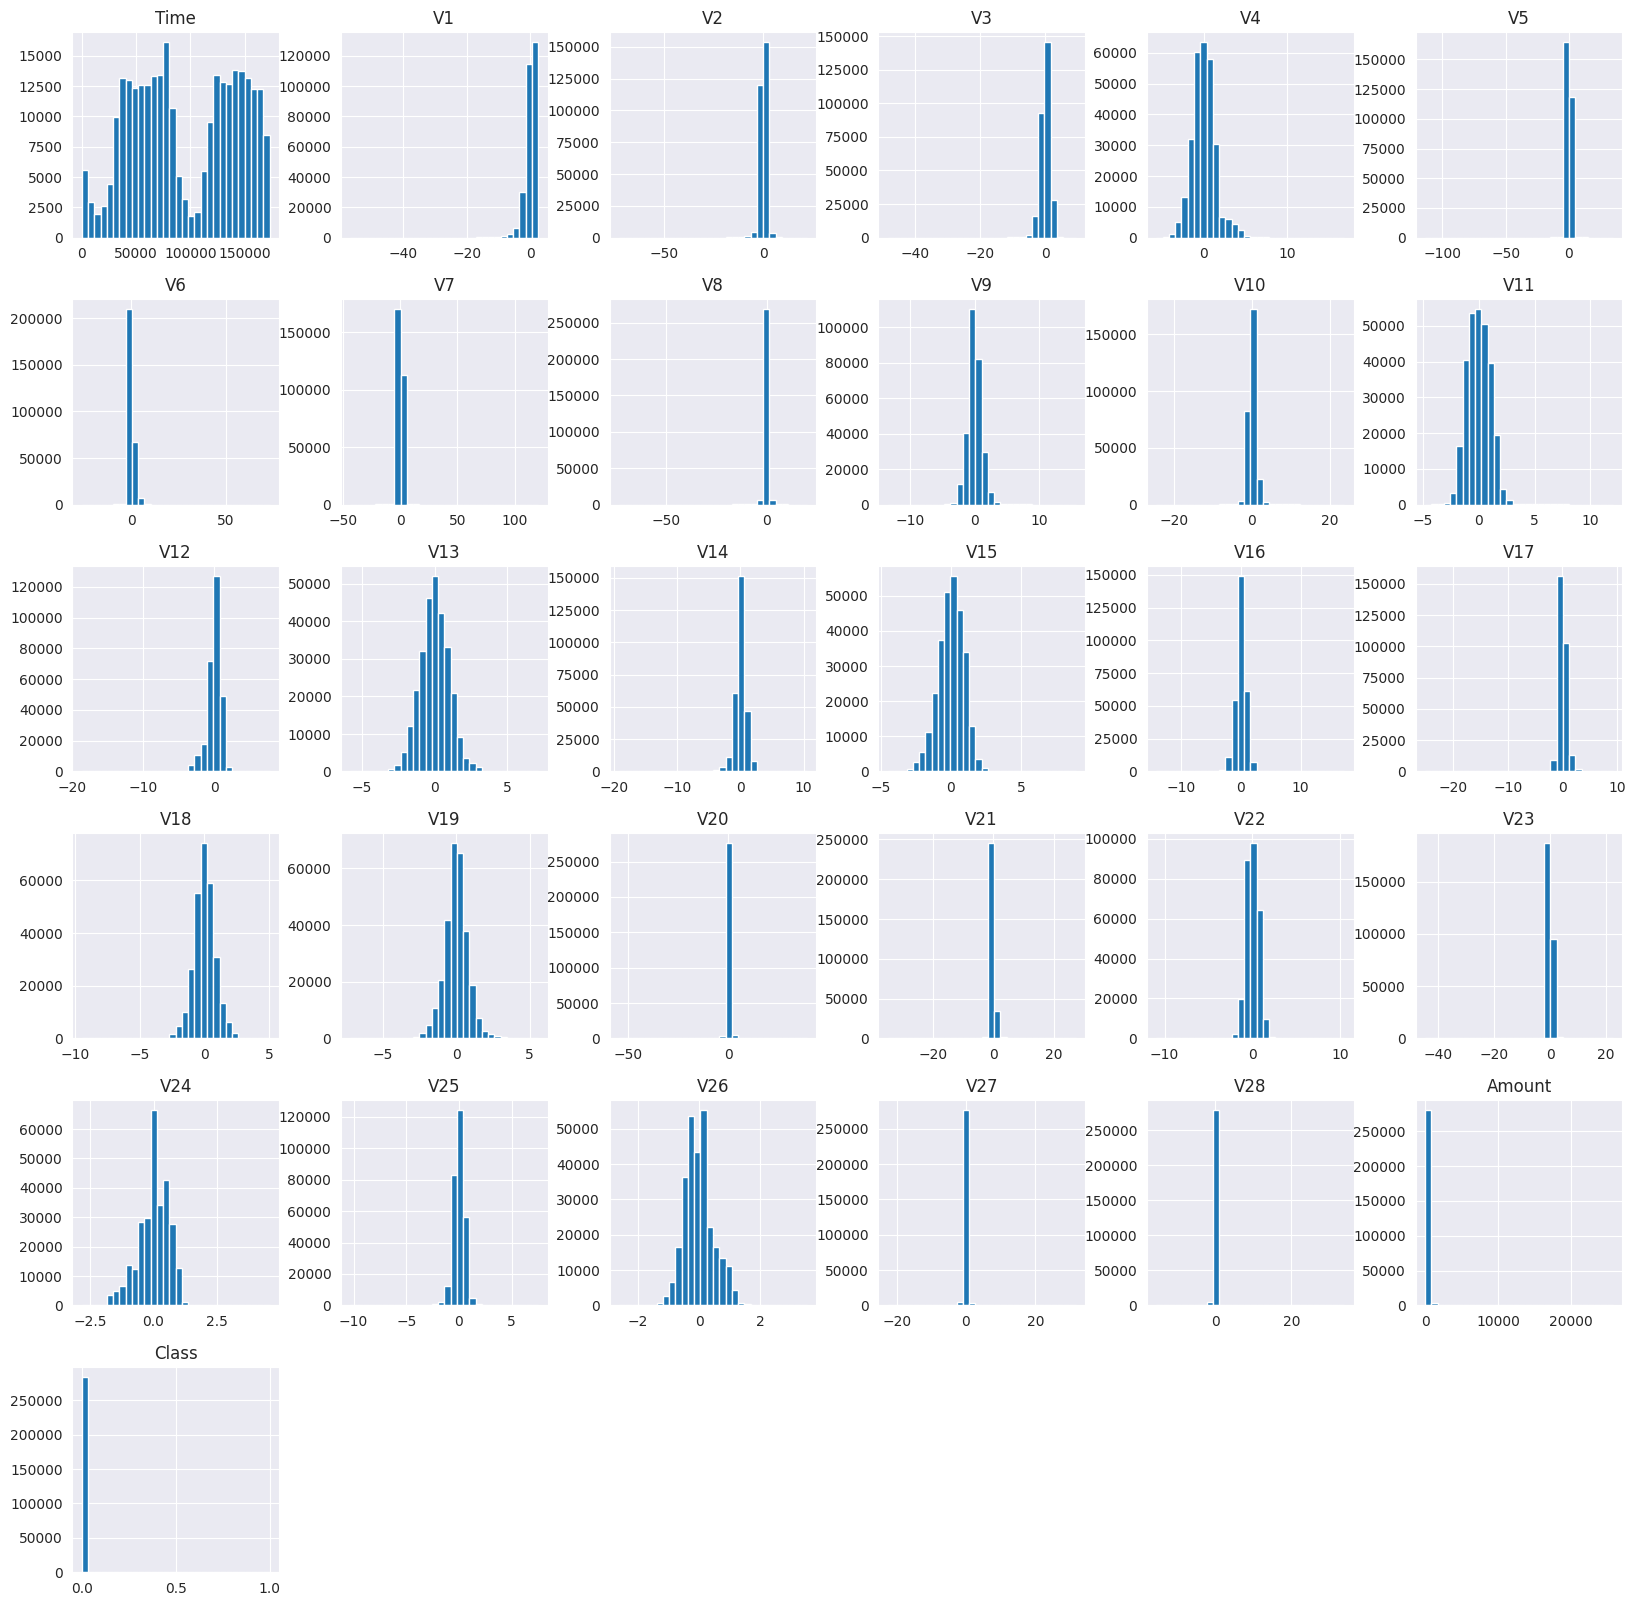

In [8]:
def plot_histogram(dataset, bins, size=(5, 5)):
    sns.set_style("darkgrid")
    plot = dataset.hist(bins=bins, figsize=size)
    plt.title("Distribution of Each Variable")
    plt.show()

plot_histogram(df, 30, size=(20,20))

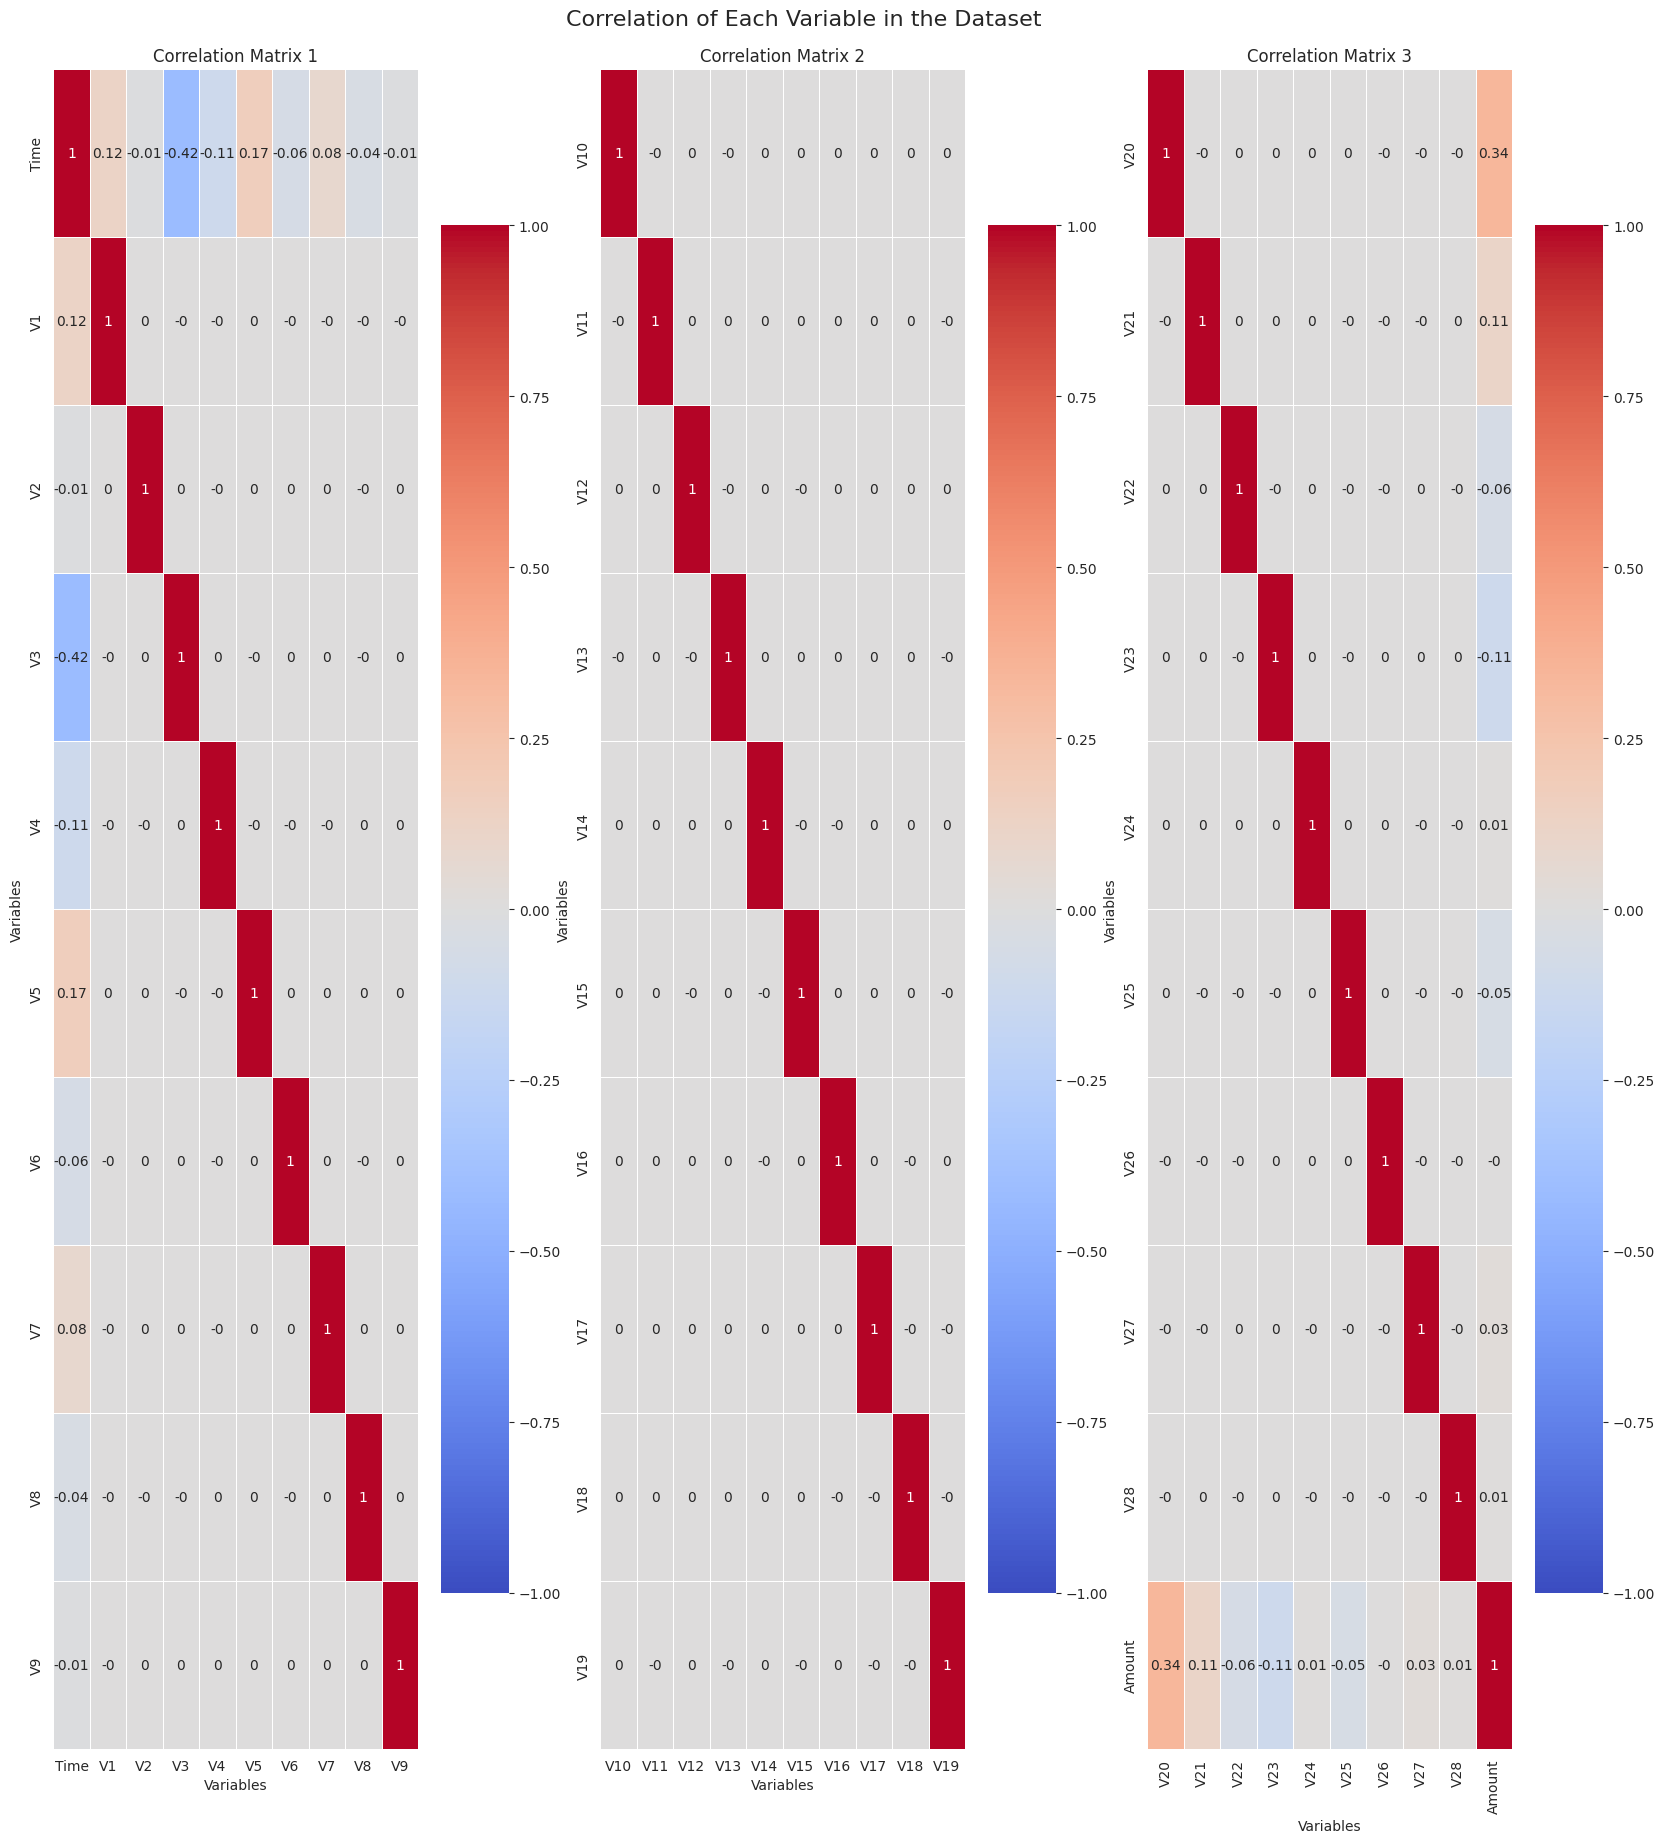

In [9]:
def plot_correlation_matrix(dataset):
    fig, axes = plt.subplots(1, 3, figsize=(20, 20))
    correlation_matrices = [dataset.corr().iloc[i*10:(i+1)*10, i*10:(i+1)*10].round(2) for i in range(3)]

    for i, ax in enumerate(axes):
        sns.heatmap(correlation_matrices[i], annot=True, cmap='coolwarm', linewidths=0.7, vmin=-1, vmax=1, fmt='.2g', ax=ax)
        ax.set_title(f"Correlation Matrix {i+1}")
        ax.set_xlabel("Variables")
        ax.set_ylabel("Variables")

    fig.suptitle("Correlation of Each Variable in the Dataset", fontsize=16)
    fig.subplots_adjust(top=0.95)
    plt.show()


plot_correlation_matrix(df)

# **DATA EXPLORATION**

In [10]:
cls=df.Class.value_counts().reset_index()
cls.rename(columns={"Class":"No of instances", "index":"Class"}, inplace=True)
cls.replace(to_replace=[0, 1],value=["Not Fraud","Fraud"], inplace=True)
cls

No of instances   count
0       Not Fraud  284315
1           Fraud     492

In [12]:
not_fraud_class = df[df["Class"] == 0]
fraud_class = df[df["Class"] == 1]

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with shared x-axis
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, x_title="Transaction Amount", y_title="Count")
fig.add_trace(go.Histogram(x=fraud_class.Amount, name='Frauds'), row=1, col=1)
fig.add_trace(go.Histogram(x=not_fraud_class.Amount, name='Non-Frauds'), row=2, col=1)
fig.update_layout(title='Fraud Transaction Amount Vs Non-Frauds Transaction Amount', height=800, width=800, template="presentation")
fig.update_xaxes(range=[0, 6000], row=1, showticklabels=True)
fig.update_xaxes(range=[0, 6000], row=2, showticklabels=True)
fig.show()

In [14]:
t1 = df[(df['Time'] <= 86400) & (df['Class'] == 0)]
t1['Time'] = t1['Time'].apply(lambda x: round(x / 3600, 2))

# First day frauds
t2 = df[(df['Time'] <= 86400) & (df['Class'] == 1)]
t2['Time'] = t2['Time'].apply(lambda x: round(x / 3600, 2))

# Second day no frauds
t3 = df[(df['Time'] > 86400) & (df['Class'] == 0)]
t3['Time'] = t3['Time'].apply(lambda x: round(x / 3600, 2) - 24.00)

# Second day frauds
t4 = df[(df['Time'] > 86400) & (df['Class'] == 1)]
t4['Time'] = t4['Time'].apply(lambda x: round(x / 3600, 2) - 24.00)

fig = make_subplots(rows=2, cols=2, subplot_titles=["1st day, No Frauds", "1st day, Frauds", "2nd day, No Frauds", "2nd day, Frauds"],
                    x_title="Time of Transaction", y_title="Count")

# Add traces to the subplots
fig.add_trace(go.Histogram(x=t1['Time'], name='1st day, No Frauds'), row=1, col=1)
fig.add_trace(go.Histogram(x=t2['Time'], name='1st day, Frauds'), row=1, col=2)
fig.add_trace(go.Histogram(x=t3['Time'], name='2nd day, No Frauds'), row=2, col=1)
fig.add_trace(go.Histogram(x=t4['Time'], name='2nd day, Frauds'), row=2, col=2)

fig.update_layout(title='Fraud Transaction Times Vs Non-Frauds Transaction Time', height=800, width=800, template="presentation")


fig.show()

<ipython-input-14-a43a208b6822>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-a43a208b6822>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-a43a208b6822>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-a43a20

# **MACHINE LEARNING**

In [15]:
# Split the Data into Training and Testing Sets
X = df.drop('Class', axis=1)  # Features (V1 - V28, Time, Amount)
y = df['Class']                # Target variable (Class)

from sklearn.model_selection import train_test_split # import train_test_split for splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Standardize the Features
from sklearn.preprocessing import StandardScaler # import the StandardScaler class
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Model
from sklearn.linear_model import LogisticRegression # import the LogisticRegression class
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
# Step 6: Apply Various Resampling Techniques
!pip install -q imblearn
from imblearn.under_sampling import RandomUnderSampler # import the RandomUnderSampler class
from imblearn.over_sampling import RandomOverSampler, SMOTE # import additional classes for oversampling
from imblearn.under_sampling import NearMiss

# 6.1 Random UnderSampling
under_sampler = RandomUnderSampler(random_state=0)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_scaled, y_train)
print("UnderSampling - Class distribution:", np.bincount(y_train_under))

# 6.2 Random OverSampling
over_sampler = RandomOverSampler(random_state=0)
X_train_over, y_train_over = over_sampler.fit_resample(X_train_scaled, y_train)
print("OverSampling - Class distribution:", np.bincount(y_train_over))

# 6.3 SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print("SMOTE - Class distribution:", np.bincount(y_train_smote))

# 6.4 NearMiss
near_miss = NearMiss()
X_train_near, y_train_near = near_miss.fit_resample(X_train_scaled, y_train)
print("NearMiss - Class distribution:", np.bincount(y_train_near))

# Now you can proceed to build and evaluate your models using the resampled datasets.

UnderSampling - Class distribution: [394 394]
OverSampling - Class distribution: [227451 227451]
SMOTE - Class distribution: [227451 227451]
NearMiss - Class distribution: [394 394]


# **MACHINE LEARNING MODELS**

# **Random Forest Classifier**

In [17]:
# Step 1: Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 2: Train the Random Forest Classifier on the NearMiss Sample Set
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_near, y_train_near)

# Step 3: Make Predictions on the Test Set
y_test_pred = rf_model.predict(scaler.transform(X_test))  # Scale the test set using the same scaler
y_test_pred_proba = rf_model.predict_proba(scaler.transform(X_test))[:, 1]  # Get probabilities for ROC AUC

# Step 4: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC Score:", roc_auc)

Confusion Matrix:
[[ 1804 55060]
 [    4    94]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06     56864
           1       0.00      0.96      0.00        98

    accuracy                           0.03     56962
   macro avg       0.50      0.50      0.03     56962
weighted avg       1.00      0.03      0.06     56962

ROC AUC Score: 0.8842817233815304


# **Decision Tree Classifier**

In [18]:
# Step 1: Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Step 2: Train the Decision Tree Classifier on the NearMiss Sample Set
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_near, y_train_near)

# Step 3: Make Predictions on the Test Set
y_test_pred_dt = dt_model.predict(scaler.transform(X_test))  # Scale the test set using the same scaler
y_test_pred_proba_dt = dt_model.predict_proba(scaler.transform(X_test))[:, 1]  # Get probabilities for ROC AUC

# Step 4: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))

# Calculate and print ROC AUC score
roc_auc_dt = roc_auc_score(y_test, y_test_pred_proba_dt)
print("ROC AUC Score:", roc_auc_dt)

Confusion Matrix:
[[ 5232 51632]
 [    7    91]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17     56864
           1       0.00      0.93      0.00        98

    accuracy                           0.09     56962
   macro avg       0.50      0.51      0.09     56962
weighted avg       1.00      0.09      0.17     56962

ROC AUC Score: 0.510290216255326


# **LOGISTIC REGRESSION CLASSIFIER**

In [19]:
# Step 1: Import the necessary libraries for the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Step 2: Train and Evaluate Logistic Regression
# Initialize and train the model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_near, y_train_near)

# Make predictions
y_test_pred_logistic = logistic_model.predict(scaler.transform(X_test))
y_test_pred_proba_logistic = logistic_model.predict_proba(scaler.transform(X_test))[:, 1]

# Evaluate the model
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_logistic))
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_test_pred_logistic))
print("Logistic Regression - ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba_logistic))

Logistic Regression - Confusion Matrix:
[[31842 25022]
 [    7    91]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     56864
           1       0.00      0.93      0.01        98

    accuracy                           0.56     56962
   macro avg       0.50      0.74      0.36     56962
weighted avg       1.00      0.56      0.72     56962

Logistic Regression - ROC AUC Score: 0.8764664419510065


# **SVM CLASSIFIER**

In [20]:
# Step 3: Train and Evaluate Support Vector Machine (SVM)
# Initialize and train the model
svm_model = SVC(probability=True, random_state=0)  # Set probability=True to get probabilities for ROC AUC
svm_model.fit(X_train_near, y_train_near)

# Make predictions
y_test_pred_svm = svm_model.predict(scaler.transform(X_test))
y_test_pred_proba_svm = svm_model.predict_proba(scaler.transform(X_test))[:, 1]

# Evaluate the model
print("\nSVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_svm))
print("\nSVM - Classification Report:")
print(classification_report(y_test, y_test_pred_svm))
print("SVM - ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba_svm))


SVM - Confusion Matrix:
[[51929  4935]
 [   10    88]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.90      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.91      0.95     56962

SVM - ROC AUC Score: 0.9487832766758927


# **XGBOOST CLASSIFIER**

In [21]:
# Step 4: Train and Evaluate XGBoost
# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_model.fit(X_train_near, y_train_near)

# Make predictions
y_test_pred_xgb = xgb_model.predict(scaler.transform(X_test))
y_test_pred_proba_xgb = xgb_model.predict_proba(scaler.transform(X_test))[:, 1]

# Evaluate the model
print("\nXGBoost - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb))
print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))
print("XGBoost - ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[22:03:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





XGBoost - Confusion Matrix:
[[ 3651 53213]
 [    2    96]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12     56864
           1       0.00      0.98      0.00        98

    accuracy                           0.07     56962
   macro avg       0.50      0.52      0.06     56962
weighted avg       1.00      0.07      0.12     56962

XGBoost - ROC AUC Score: 0.8626495512386159


# **APPLYING SMOTE**

In [22]:
# Step 1: Import the necessary libraries for SMOTE and the model
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after SMOTE
print("SMOTE - Class distribution:", np.bincount(y_train_smote))

# Step 3: Train the Decision Tree Classifier on the SMOTE Sample Set
dt_model_smote = DecisionTreeClassifier(random_state=0)
dt_model_smote.fit(X_train_smote, y_train_smote)

# Step 4: Make Predictions on the Test Set
y_test_pred_smote = dt_model_smote.predict(scaler.transform(X_test))  # Scale the test set using the same scaler
y_test_pred_proba_smote = dt_model_smote.predict_proba(scaler.transform(X_test))[:, 1]  # Get probabilities for ROC AUC

# Step 5: Evaluate the Model
print("\nDecision Tree with SMOTE - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_smote))

print("\nDecision Tree with SMOTE - Classification Report:")
print(classification_report(y_test, y_test_pred_smote))

# Calculate and print ROC AUC score
roc_auc_smote = roc_auc_score(y_test, y_test_pred_proba_smote)
print("Decision Tree with SMOTE - ROC AUC Score:", roc_auc_smote)

SMOTE - Class distribution: [227451 227451]

Decision Tree with SMOTE - Confusion Matrix:
[[56742   122]
 [   25    73]]

Decision Tree with SMOTE - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.74      0.50        98

    accuracy                           1.00     56962
   macro avg       0.69      0.87      0.75     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree with SMOTE - ROC AUC Score: 0.8713762446452976
